%%capture
!pip install pandas==1.0.5;
!pip install numpy==1.19.0;
!pip install seaborn==0.10.1;
!pip install matplotlib==3.2.1;
!pip install statsmodels==0.11.1;
!pip install plotly

In [297]:
import numpy                            as      np
import pandas                           as      pd
from sklearn                            import  metrics

import statsmodels
from statsmodels.tsa.seasonal           import  seasonal_decompose
from statsmodels.tsa.api                import  ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.graphics.tsaplots      import  plot_acf, plot_pacf

import plotly.graph_objects             as      go
from plotly.subplots                    import  make_subplots
import seaborn                          as      sns
from matplotlib                         import  pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [298]:
rd1 = pd.read_csv(r'..\data\Rose.csv', parse_dates=['YearMonth'],index_col='YearMonth'); rd1.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [299]:
rd2 = pd.read_csv(r'..\data\Sparkling.csv', parse_dates=['YearMonth'],index_col='YearMonth'); rd2.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


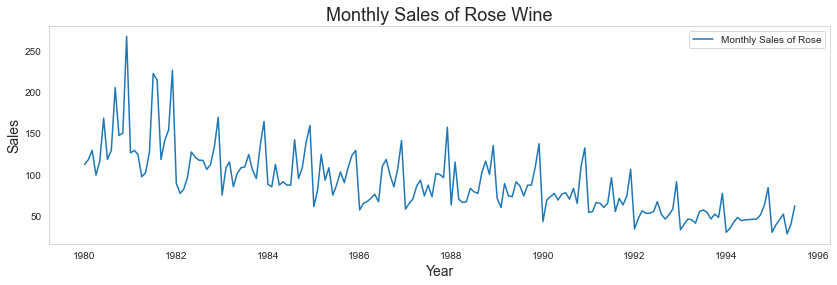

In [300]:
figure, axes = plt.subplots(1,1,figsize=(14,4))
sns.lineplot(y=rd1['Rose'],x=rd1.index)
plt.legend(['Monthly Sales of Rose'])
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.title('Monthly Sales of Rose Wine', fontsize=18)
plt.grid(); plt.show()

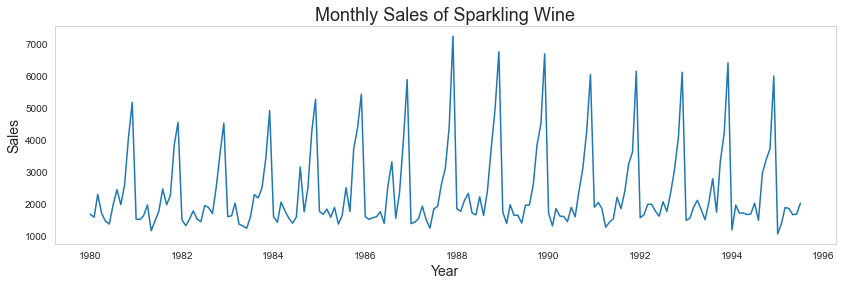

In [301]:
figure, axes = plt.subplots(1,1,figsize=(14,4))
sns.lineplot(y=rd2['Sparkling'],x=rd2.index)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.title('Monthly Sales of Sparkling Wine', fontsize=18)
plt.grid(); plt.show()

In [302]:
rd1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [303]:
rd2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [304]:
round(rd1.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Rose,185.0,90.39,39.18,28.0,63.0,86.0,112.0,267.0


In [305]:
round(rd2.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Sparkling,187.0,2402.42,1295.11,1070.0,1605.0,1874.0,2549.0,7242.0


Text(0.5, 1.0, 'Boxplot of Rose wine sales')

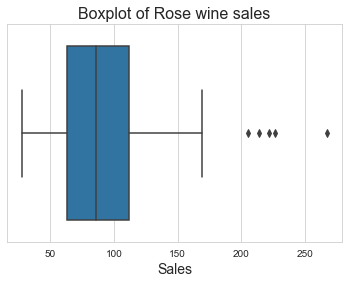

In [306]:
sns.boxplot(rd1)
plt.xlabel('Sales', fontsize=14)
plt.title('Boxplot of Rose wine sales', fontsize=16)

Text(0.5, 1.0, 'Boxplot of Sparkling wine sales')

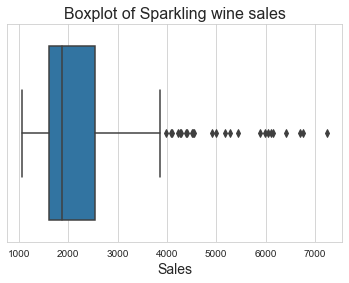

In [307]:
sns.boxplot(rd2)
plt.xlabel('Sales', fontsize=14)
plt.title('Boxplot of Sparkling wine sales', fontsize=16)

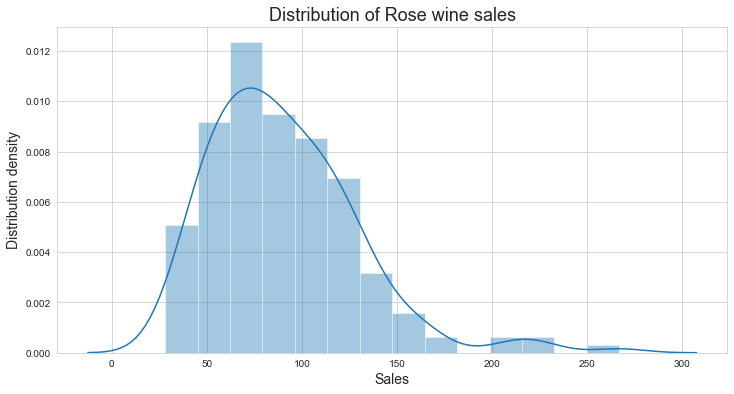

In [308]:
fig = plt.subplots(figsize=(12,6)); sns.set_style('whitegrid')
sns.distplot(rd1)
plt.title('Distribution of Rose wine sales', fontsize=18); plt.xlabel('Sales', fontsize=14); plt.ylabel('Distribution density', fontsize=14);
plt.show()

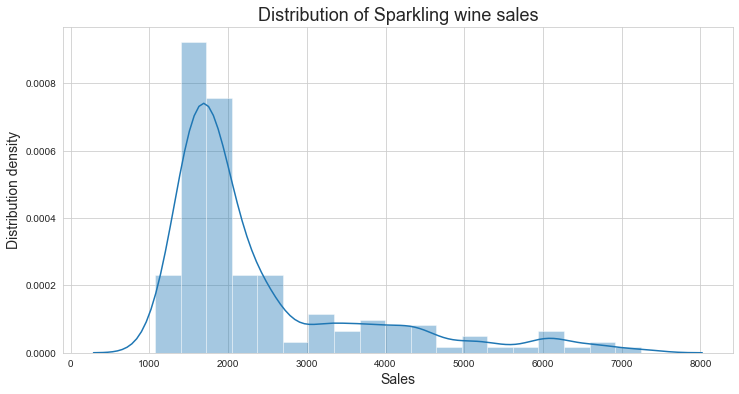

In [309]:
fig = plt.subplots(figsize=(12,6)); sns.set_style('whitegrid')
sns.distplot(rd2)
plt.title('Distribution of Sparkling wine sales', fontsize=18); plt.xlabel('Sales', fontsize=14); plt.ylabel('Distribution density', fontsize=14);
plt.show()

In [310]:
rd1.isnull()

,Rose
YearMonth,
1980-01-01,False
1980-02-01,False
1980-03-01,False
1980-04-01,False
1980-05-01,False
...,...
1995-03-01,False
1995-04-01,False
1995-05-01,False


In [311]:
import plotly.express as px

fig = px.line(rd1,x=rd1.index,y=rd1['Rose'])

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector = dict(
        buttons = list([
            dict(count=6, label='6m', step='month', stepmode='backward'),
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=3, label='3y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

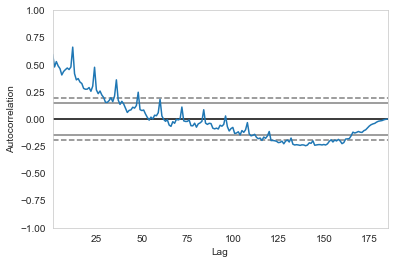

In [312]:
pd.plotting.autocorrelation_plot(rd1.dropna())

Text(0.5, 1.0, 'Lag plot with lag = 1')

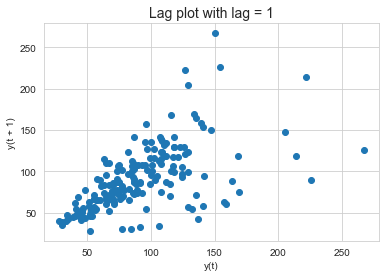

In [313]:
pd.plotting.lag_plot(rd1,lag=1)
plt.title('Lag plot with lag = 1', fontsize=14)

Text(0.5, 1.0, 'Lag plot with lag = 2')

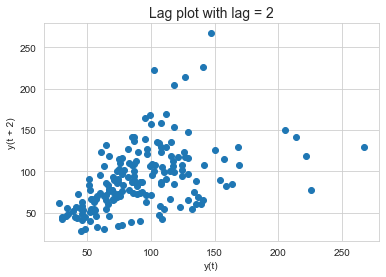

In [314]:
pd.plotting.lag_plot(rd1,lag=2)
plt.title('Lag plot with lag = 2', fontsize=14)

Text(0.5, 1.0, 'Lag plot with lag = 3')

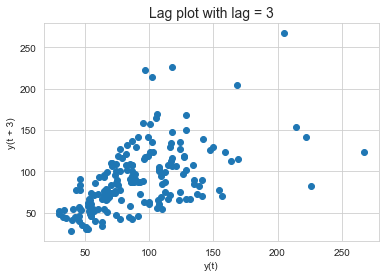

In [315]:
pd.plotting.lag_plot(rd1,lag=3)
plt.title('Lag plot with lag = 3', fontsize=14)

Text(0.5, 1.0, 'Lag plot with lag = 12')

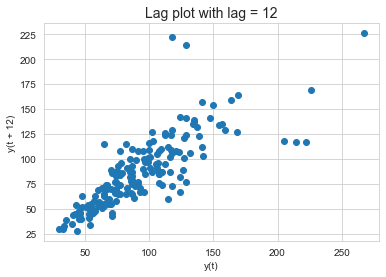

In [316]:
pd.plotting.lag_plot(rd1,lag=12)
plt.title('Lag plot with lag = 12', fontsize=14)

Text(0.5, 1.0, 'Lag plot with lag = 11')

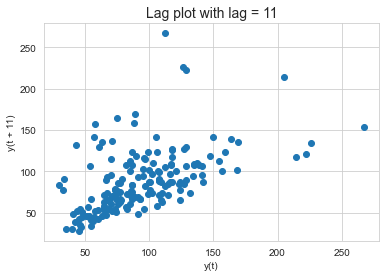

In [317]:
pd.plotting.lag_plot(rd1,lag=11)
plt.title('Lag plot with lag = 11', fontsize=14)

Text(0.5, 1.0, 'Lag plot with lag = 10')

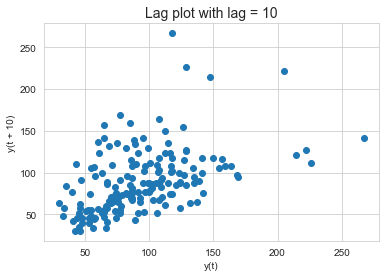

In [318]:
pd.plotting.lag_plot(rd1,lag=10)
plt.title('Lag plot with lag = 10', fontsize=14)

Text(0.5, 1.0, 'Lag plot with lag = 13')

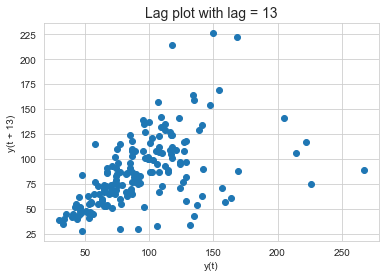

In [319]:
pd.plotting.lag_plot(rd1,lag=13)
plt.title('Lag plot with lag = 13', fontsize=14)

Text(0.5, 1.0, 'Lag plot with lag = 24')

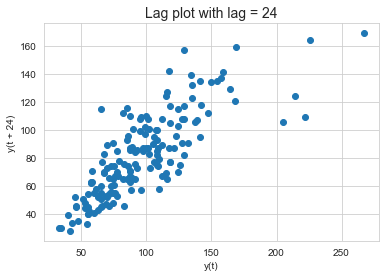

In [320]:
pd.plotting.lag_plot(rd1,lag=24)
plt.title('Lag plot with lag = 24', fontsize=14)

In [321]:
rd1.iloc[162:176]

,Rose
YearMonth,
1993-07-01,57.0
1993-08-01,54.0
1993-09-01,46.0
1993-10-01,52.0
1993-11-01,48.0
1993-12-01,77.0
1994-01-01,30.0
1994-02-01,35.0
1994-03-01,42.0


In [322]:
fig = px.line(rd1,x=rd1.index,y=rd1['Rose'])

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector = dict(
        buttons = list([
            dict(count=6, label='6m', step='month', stepmode='backward'),
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=3, label='3y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

In [323]:
rd1.loc['1994-07-01']=57

In [324]:
rd1.loc['1994-08-01']=54

In [325]:
fig = px.line(rd1,x=rd1.index,y=rd1['Rose'])

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector = dict(
        buttons = list([
            dict(count=6, label='6m', step='month', stepmode='backward'),
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=3, label='3y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
fig.show()

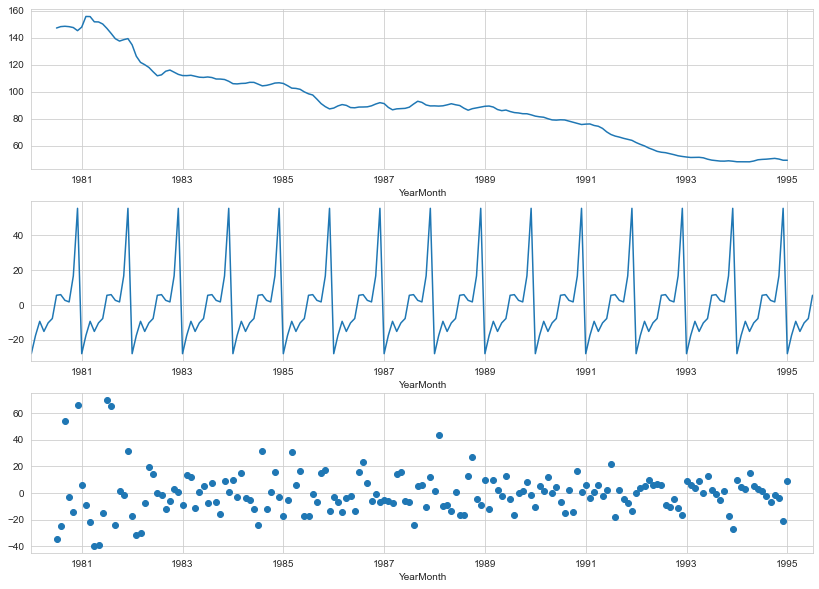

In [326]:
figure,axes = plt.subplots(3,1,figsize=(14,10))
rose_add_dcmps = seasonal_decompose(rd1, model='additive')
rose_add_dcmps.trend.plot(ax=axes[0])
rose_add_dcmps.seasonal.plot(ax=axes[1])
rose_add_dcmps.resid.plot(ax=axes[2], style='o')
plt.show()

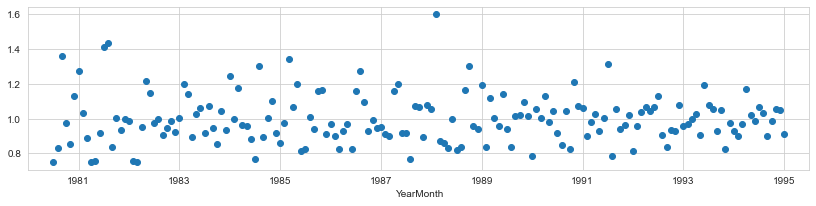

In [327]:
figure,axes = plt.subplots(1,1,figsize=(14,3))
rose_mul_dcmps = seasonal_decompose(rd1, model='multiplicative')
rose_mul_dcmps.resid.plot(style='o')
plt.show()

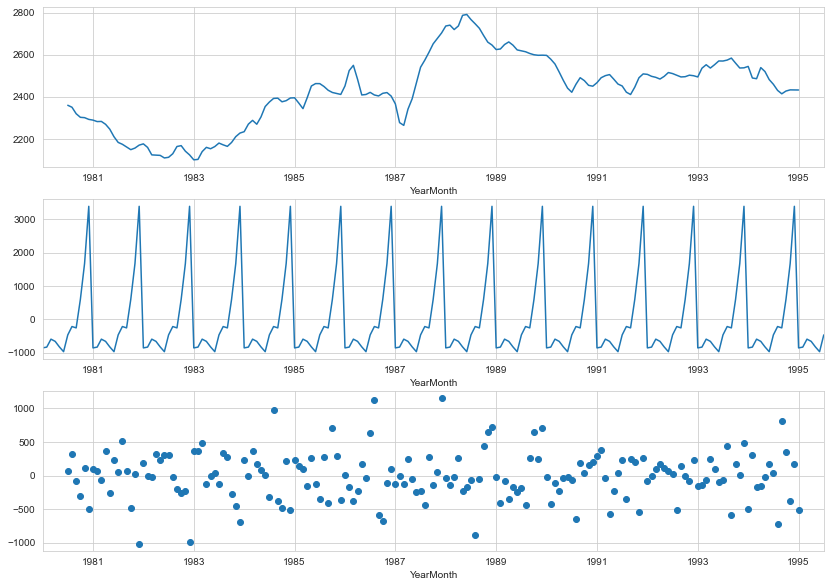

In [328]:
figure,axes = plt.subplots(3,1,figsize=(14,10))
sparkling_add_dcmps = seasonal_decompose(rd2, model='additive')
sparkling_add_dcmps.trend.plot(ax=axes[0])
sparkling_add_dcmps.seasonal.plot(ax=axes[1])
sparkling_add_dcmps.resid.plot(ax=axes[2], style='o')
plt.show()

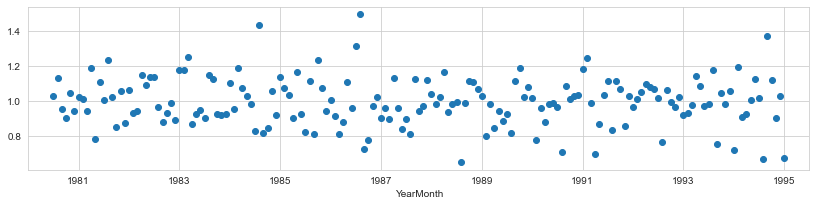

In [329]:
figure,axes = plt.subplots(1,1,figsize=(14,3))
sparkling_mul_dcmps = seasonal_decompose(rd2, model='multiplicative')
sparkling_mul_dcmps.resid.plot(style='o')
plt.show()

In [330]:
df_rose = rd1.copy()
df_sparkling = rd2.copy()

In [331]:
df_rose.tail()

,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [332]:
train_Rose = df_rose.iloc[:132]
test_Rose = df_rose.iloc[132:]

In [333]:
train_Sparkling = df_sparkling.iloc[:132]
test_Sparkling = df_sparkling.iloc[132:]

In [334]:
print('The shape of training data for Rose wine is :',train_Rose.shape)
print('The shape of test data for Rose wine is :',test_Rose.shape)
print('The shape of training data for Sparkling wine is :',train_Sparkling.shape)
print('The shape of test data for Sparkling wine is :',test_Sparkling.shape)

The shape of training data for Rose wine is : (132, 1)
The shape of test data for Rose wine is : (55, 1)
The shape of training data for Sparkling wine is : (132, 1)
The shape of test data for Sparkling wine is : (55, 1)


In [335]:
test_Rose.head()

,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


In [336]:
test_Sparkling.head()

,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


In [337]:
train_Rose.tail()

,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


In [338]:
train_Sparkling.tail()

,Sparkling
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


In [339]:
plot1 = go.Scatter(x=train_Rose.index,y=train_Rose['Rose'],name='Training')
plot2 = go.Scatter(x=test_Rose.index,y=test_Rose['Rose'],name='Test')

fig_Rose = make_subplots(shared_xaxes=True, shared_yaxes=True)
fig_Rose.add_trace(plot1)
fig_Rose.add_trace(plot2)
fig_Rose.update_layout(
    title="Plotting training and test data of Rose wine",
    xaxis_title="Year", yaxis_title="Sales",
    legend=dict(yanchor="top", y=0.99, xanchor="right", x=0.99, bordercolor='#1E3163', borderwidth=1),
    width=1200, height=500, plot_bgcolor = '#F8F8F8',
    margin=dict(l=0, r=0, b=0, t=30, pad=0)
)
fig_Rose.show()

In [340]:
plot1 = go.Scatter(x=train_Sparkling.index,y=train_Sparkling['Sparkling'],name='Training')
plot2 = go.Scatter(x=test_Sparkling.index,y=test_Sparkling['Sparkling'],name='Test')

fig_Sparkling = make_subplots(shared_xaxes=True, shared_yaxes=True)
fig_Sparkling.add_trace(plot1)
fig_Sparkling.add_trace(plot2)
fig_Sparkling.update_layout(
    title="Plotting training and test data of Sparkling wine",
    xaxis_title="Year", yaxis_title="Sales",
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01, bordercolor='#1E3163', borderwidth=1),
    width=1200, height=500, plot_bgcolor = '#F8F8F8',
    margin=dict(l=0, r=0, b=0, t=30, pad=0)
)
fig_Sparkling.show()

## Naive Model - Forecast

In [341]:
NaiveModel_train = train_Rose.copy()
NaiveModel_test = test_Rose.copy()

In [342]:
NaiveModel_test['naive'] = np.asarray(train_Rose['Rose'])[len(np.asarray(train_Rose['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

In [343]:
plot3 = go.Scatter(x=NaiveModel_test.index,y=NaiveModel_test['naive'],name='NaiveModel'); fig_Rose.add_trace(plot3); fig_Rose.show()

In [344]:
rmse_test = metrics.mean_squared_error(test_Rose['Rose'],NaiveModel_test['naive'],squared=False)

TestResults_Rose = pd.DataFrame({'Test RMSE': [rmse_test]},index=['NaiveModel'])

TestResults_Rose

,Test RMSE
NaiveModel,79.34665


In [345]:
NaiveModel_train = train_Sparkling.copy()
NaiveModel_test = test_Sparkling.copy()
NaiveModel_test['naive'] = np.asarray(train_Sparkling['Sparkling'])[len(np.asarray(train_Sparkling['Sparkling']))-1]
NaiveModel_test['naive'].head()
plot3 = go.Scatter(x=NaiveModel_test.index,y=NaiveModel_test['naive'],name='NaiveModel'); fig_Sparkling.add_trace(plot3); fig_Sparkling.show()
rmse_test = metrics.mean_squared_error(test_Sparkling['Sparkling'],NaiveModel_test['naive'],squared=False)

TestResults_Sparkling = pd.DataFrame({'Test RMSE': [rmse_test]},index=['NaiveModel'])

TestResults_Sparkling

,Test RMSE
NaiveModel,3864.279352


## Simple Average

In [346]:
SimpleAverage_train = train_Rose.copy()
SimpleAverage_test = test_Rose.copy()
SimpleAverage_test['SimpleAvg'] = train_Rose['Rose'].mean()
plot4 = go.Scatter(x=SimpleAverage_test.index,y=SimpleAverage_test['SimpleAvg'],name='SimpleAverage'); fig_Rose.add_trace(plot4); fig_Rose.show()
rmse_test = metrics.mean_squared_error(test_Rose['Rose'],SimpleAverage_test['SimpleAvg'],squared=False)

TestResult_Temp = pd.DataFrame({'Test RMSE': [rmse_test]},index=['SimpleAverage'])

TestResults_Rose = pd.concat([TestResults_Rose, TestResult_Temp])
TestResults_Rose

,Test RMSE
NaiveModel,79.346650
SimpleAverage,53.089745


In [347]:
SimpleAverage_train = train_Sparkling.copy()
SimpleAverage_test = test_Sparkling.copy()
SimpleAverage_test['SimpleAvg'] = train_Sparkling['Sparkling'].mean()
plot4 = go.Scatter(x=SimpleAverage_test.index,y=SimpleAverage_test['SimpleAvg'],name='SimpleAverage'); fig_Sparkling.add_trace(plot4); fig_Sparkling.show()
rmse_test = metrics.mean_squared_error(test_Sparkling['Sparkling'],SimpleAverage_test['SimpleAvg'],squared=False)

TestResult_Temp = pd.DataFrame({'Test RMSE': [rmse_test]},index=['SimpleAverage'])

TestResults_Sparkling = pd.concat([TestResults_Sparkling, TestResult_Temp])
TestResults_Sparkling

,Test RMSE
NaiveModel,3864.279352
SimpleAverage,1275.081804


## Moving Average

In [348]:
MovingAverage = rd1.copy()
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()
MovingAverage.head(10)

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.50,NaN,NaN
1980-05-01,116.0,107.5,115.50,NaN,NaN
1980-06-01,168.0,142.0,128.00,123.666667,NaN
1980-07-01,118.0,143.0,125.25,124.666667,NaN
1980-08-01,129.0,123.5,132.75,126.500000,NaN
1980-09-01,205.0,167.0,155.00,139.166667,132.666667


In [349]:
MovingAverage_train = MovingAverage.iloc[:132].copy() 
MovingAverage_test = MovingAverage.iloc[132:].copy()

plot5 = go.Scatter(x=MovingAverage_test.index,y=MovingAverage_test['Trailing_2'],name='2 pt Trailing MA'); fig_Rose.add_trace(plot5); 
plot6 = go.Scatter(x=MovingAverage_test.index,y=MovingAverage_test['Trailing_4'],name='4 pt Trailing MA'); fig_Rose.add_trace(plot6); 
plot7 = go.Scatter(x=MovingAverage_test.index,y=MovingAverage_test['Trailing_6'],name='6 pt Trailing MA'); fig_Rose.add_trace(plot7); 
plot8 = go.Scatter(x=MovingAverage_test.index,y=MovingAverage_test['Trailing_9'],name='9 pt Trailing MA'); fig_Rose.add_trace(plot8); 

fig_Rose.show()

In [350]:
rmse_test_2 = metrics.mean_squared_error(test_Rose['Rose'],MovingAverage_test['Trailing_2'],squared=False)
rmse_test_4 = metrics.mean_squared_error(test_Rose['Rose'],MovingAverage_test['Trailing_4'],squared=False)
rmse_test_6 = metrics.mean_squared_error(test_Rose['Rose'],MovingAverage_test['Trailing_6'],squared=False)
rmse_test_9 = metrics.mean_squared_error(test_Rose['Rose'],MovingAverage_test['Trailing_9'],squared=False)

TestResult_Temp = pd.DataFrame({'Test RMSE': [rmse_test_2,rmse_test_4
                                          ,rmse_test_6,rmse_test_9]}
                           ,index=['2ptTrailingMovingAverage','4ptTrailingMovingAverage'
                                   ,'6ptTrailingMovingAverage','9ptTrailingMovingAverage'])

TestResults_Rose = pd.concat([TestResults_Rose, TestResult_Temp])
TestResults_Rose

,Test RMSE
NaiveModel,79.346650
SimpleAverage,53.089745
2ptTrailingMovingAverage,11.571910
4ptTrailingMovingAverage,14.482081
6ptTrailingMovingAverage,14.544429
9ptTrailingMovingAverage,14.771062


In [351]:
MovingAverage = rd2.copy()
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage_train = MovingAverage.iloc[:132].copy() 
MovingAverage_test = MovingAverage.iloc[132:].copy()

plot5 = go.Scatter(x=MovingAverage_test.index,y=MovingAverage_test['Trailing_2'],name='2 pt Trailing MA'); fig_Sparkling.add_trace(plot5); 
plot6 = go.Scatter(x=MovingAverage_test.index,y=MovingAverage_test['Trailing_4'],name='4 pt Trailing MA'); fig_Sparkling.add_trace(plot6); 
plot7 = go.Scatter(x=MovingAverage_test.index,y=MovingAverage_test['Trailing_6'],name='6 pt Trailing MA'); fig_Sparkling.add_trace(plot7); 
plot8 = go.Scatter(x=MovingAverage_test.index,y=MovingAverage_test['Trailing_9'],name='9 pt Trailing MA'); fig_Sparkling.add_trace(plot8); 

fig_Sparkling.show()

In [352]:
rmse_test_2 = metrics.mean_squared_error(test_Sparkling['Sparkling'],MovingAverage_test['Trailing_2'],squared=False)
rmse_test_4 = metrics.mean_squared_error(test_Sparkling['Sparkling'],MovingAverage_test['Trailing_4'],squared=False)
rmse_test_6 = metrics.mean_squared_error(test_Sparkling['Sparkling'],MovingAverage_test['Trailing_6'],squared=False)
rmse_test_9 = metrics.mean_squared_error(test_Sparkling['Sparkling'],MovingAverage_test['Trailing_9'],squared=False)

TestResult_Temp = pd.DataFrame({'Test RMSE': [rmse_test_2,rmse_test_4
                                          ,rmse_test_6,rmse_test_9]}
                           ,index=['2ptTrailingMovingAverage','4ptTrailingMovingAverage'
                                   ,'6ptTrailingMovingAverage','9ptTrailingMovingAverage'])

TestResults_Sparkling = pd.concat([TestResults_Sparkling, TestResult_Temp])
TestResults_Sparkling

,Test RMSE
NaiveModel,3864.279352
SimpleAverage,1275.081804
2ptTrailingMovingAverage,813.400684
4ptTrailingMovingAverage,1156.589694
6ptTrailingMovingAverage,1283.927428
9ptTrailingMovingAverage,1346.278315


## Linear Regression

In [353]:
dfRose = rd1.copy()
dfRose['X'] = np.arange(len(dfRose))

In [354]:
dfSparkling = rd2.copy()
dfSparkling['X'] = np.arange(len(dfSparkling))

In [355]:
train_Rose = dfRose.iloc[:132].copy() 
test_Rose = dfRose.iloc[132:].copy()

train_Sparkling = dfSparkling.iloc[:132].copy() 
test_Sparkling = dfSparkling.iloc[132:].copy()

In [356]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(train_Rose['X'].to_numpy().reshape(-1,1),train_Rose['Rose'])
y_test_pred = LR.predict(test_Rose['X'].to_numpy().reshape(-1,1))

plot9 = go.Scatter(x=test_Rose.index,y=y_test_pred,name='LinearRegression'); fig_Rose.add_trace(plot9); 

fig_Rose.show()

In [357]:
rmse_test = metrics.mean_squared_error(test_Rose['Rose'],y_test_pred,squared=False)

TestResult_Temp = pd.DataFrame({'Test RMSE': [rmse_test]}
                           ,index=['LinearRegression'])

TestResults_Rose = pd.concat([TestResults_Rose, TestResult_Temp])
TestResults_Rose

,Test RMSE
NaiveModel,79.346650
SimpleAverage,53.089745
2ptTrailingMovingAverage,11.571910
4ptTrailingMovingAverage,14.482081
6ptTrailingMovingAverage,14.544429
9ptTrailingMovingAverage,14.771062
LinearRegression,15.257465


In [358]:
train_Sparkling = dfSparkling.iloc[:132].copy() 
test_Sparkling = dfSparkling.iloc[132:].copy()

train_Sparkling = dfSparkling.iloc[:132].copy() 
test_Sparkling = dfSparkling.iloc[132:].copy()

LR = LinearRegression()
LR.fit(train_Sparkling['X'].to_numpy().reshape(-1,1),train_Sparkling['Sparkling'])
y_test_pred = LR.predict(test_Sparkling['X'].to_numpy().reshape(-1,1))

plot9 = go.Scatter(x=test_Sparkling.index,y=y_test_pred,name='LinearRegression'); fig_Sparkling.add_trace(plot9); 

fig_Sparkling.show()

rmse_test = metrics.mean_squared_error(test_Sparkling['Sparkling'],y_test_pred,squared=False)

TestResult_Temp = pd.DataFrame({'Test RMSE': [rmse_test]}
                           ,index=['LinearRegression'])

TestResults_Sparkling = pd.concat([TestResults_Sparkling, TestResult_Temp])
TestResults_Sparkling

,Test RMSE
NaiveModel,3864.279352
SimpleAverage,1275.081804
2ptTrailingMovingAverage,813.400684
4ptTrailingMovingAverage,1156.589694
6ptTrailingMovingAverage,1283.927428
9ptTrailingMovingAverage,1346.278315
LinearRegression,1389.135175


## Exponential Smoothing
###   
### SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors

In [359]:
dfRose = rd1.copy()
dfSparkling = rd2.copy()

train_Rose = dfRose.iloc[:132].copy() 
test_Rose = dfRose.iloc[132:].copy()

train_Sparkling = dfSparkling.iloc[:132].copy() 
test_Sparkling = dfSparkling.iloc[132:].copy()

In [360]:
model_SES = SimpleExpSmoothing(train_Rose)
model_SES_autofit = model_SES.fit(optimized=True)
print(model_SES_autofit.params)
SES_predict = model_SES_autofit.forecast(steps=len(test_Rose))
SES_predict.head(2)

{'smoothing_level': 0.09874995867958046, 'smoothing_slope': nan, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 134.38699135899094, 'initial_slope': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


1991-01-01    87.105001
1991-02-01    87.105001
Freq: MS, dtype: float64

In [361]:
plot1 = go.Scatter(x=train_Rose.index,y=train_Rose['Rose'],name='Training')
plot2 = go.Scatter(x=test_Rose.index,y=test_Rose['Rose'],name='Test')
plot3 = go.Scatter(x=SES_predict.index, y=SES_predict, name = 'α=0.0987, SES--ETS(A, N, N)')

fig_Rose = make_subplots(shared_xaxes=True, shared_yaxes=True)
fig_Rose.add_trace(plot1)
fig_Rose.add_trace(plot2)
fig_Rose.add_trace(plot3)
fig_Rose.update_layout(
    title="Plotting training and test data of Rose wine",
    xaxis_title="Year", yaxis_title="Sales",
    legend=dict(yanchor="top", y=0.99, xanchor="right", x=0.99, bordercolor='#1E3163', borderwidth=1),
    width=1200, height=500, plot_bgcolor = '#F8F8F8',
    margin=dict(l=0, r=0, b=0, t=30, pad=0)
)
fig_Rose.show()

In [362]:
TestResult_Temp = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(test_Rose['Rose'],SES_predict,squared=False)]},index=['α=0.0987, SES--ETS(A,N,N)'])
TestResults_Rose = pd.concat([TestResults_Rose, TestResult_Temp])
TestResults_Rose

,Test RMSE
NaiveModel,79.346650
SimpleAverage,53.089745
2ptTrailingMovingAverage,11.571910
4ptTrailingMovingAverage,14.482081
6ptTrailingMovingAverage,14.544429
9ptTrailingMovingAverage,14.771062
LinearRegression,15.257465
"α=0.0987, SES--ETS(A,N,N)",36.433810


In [363]:
model_SES = SimpleExpSmoothing(train_Sparkling)
model_SES_autofit = model_SES.fit(optimized=True)
print(model_SES_autofit.params)
SES_predict = model_SES_autofit.forecast(steps=len(test_Sparkling))
SES_predict.head(2)

{'smoothing_level': 0.0, 'smoothing_slope': nan, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 2403.762550263244, 'initial_slope': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


1991-01-01    2403.76255
1991-02-01    2403.76255
Freq: MS, dtype: float64

In [364]:
plot1 = go.Scatter(x=train_Sparkling.index,y=train_Sparkling['Sparkling'],name='Training')
plot2 = go.Scatter(x=test_Sparkling.index,y=test_Sparkling['Sparkling'],name='Test')
plot3 = go.Scatter(x=SES_predict.index, y=SES_predict, name = 'α=0.0, SES--ETS(A, N, N)')

fig_Sparkling = make_subplots(shared_xaxes=True, shared_yaxes=True)
fig_Sparkling.add_trace(plot1)
fig_Sparkling.add_trace(plot2)
fig_Sparkling.add_trace(plot3)
fig_Sparkling.update_layout(
    title="Plotting training and test data of Sparkling wine",
    xaxis_title="Year", yaxis_title="Sales",
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01, bordercolor='#1E3163', borderwidth=1),
    width=1200, height=500, plot_bgcolor = '#F8F8F8',
    margin=dict(l=0, r=0, b=0, t=30, pad=0)
)
fig_Sparkling.show()

In [365]:
TestResult_Temp = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(test_Sparkling['Sparkling'],SES_predict,squared=False)]},index=['α=0.0, SES--ETS(A, N, N)'])
TestResults_Sparkling = pd.concat([TestResults_Sparkling, TestResult_Temp])
TestResults_Sparkling

,Test RMSE
NaiveModel,3864.279352
SimpleAverage,1275.081804
2ptTrailingMovingAverage,813.400684
4ptTrailingMovingAverage,1156.589694
6ptTrailingMovingAverage,1283.927428
9ptTrailingMovingAverage,1346.278315
LinearRegression,1389.135175
"α=0.0, SES--ETS(A, N, N)",1275.081739


## Holt - ETS(A, A, N) - Holt's linear method with additive errors

In [366]:
model_DES = Holt(train_Rose)
model_DES = model_DES.fit()
print(model_DES.params)
DES_predict =  model_DES.forecast(len(test_Rose))
DES_predict.head(2)

{'smoothing_level': 0.15789473684210525, 'smoothing_slope': 0.15789473684210525, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 112.0, 'initial_slope': 6.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


1991-01-01    86.863579
1991-02-01    88.028056
Freq: MS, dtype: float64

In [367]:
plot4 = go.Scatter(x=DES_predict.index, y=DES_predict, name = 'α=0.158, β=0.158, DES--ETS(A,A,N)'); fig_Rose.add_trace(plot4); fig_Rose.show()

In [368]:
TestResult_Temp = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(test_Rose['Rose'],DES_predict,squared=False)]},index=['α=0.158, β=0.158, DES--ETS(A,A,N)'])
TestResults_Rose = pd.concat([TestResults_Rose, TestResult_Temp])
TestResults_Rose

,Test RMSE
NaiveModel,79.346650
SimpleAverage,53.089745
2ptTrailingMovingAverage,11.571910
4ptTrailingMovingAverage,14.482081
6ptTrailingMovingAverage,14.544429
9ptTrailingMovingAverage,14.771062
LinearRegression,15.257465
"α=0.0987, SES--ETS(A,N,N)",36.433810
"α=0.158, β=0.158, DES--ETS(A,A,N)",70.129760


In [369]:
model_DES = Holt(train_Sparkling)
model_DES = model_DES.fit()
print(model_DES.params)
DES_predict =  model_DES.forecast(len(test_Sparkling))
DES_predict.head(2)

{'smoothing_level': 0.6477838823329748, 'smoothing_slope': 0.0, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 1686.0837646037185, 'initial_slope': 27.05547124370359, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


1991-01-01    5281.408344
1991-02-01    5308.463815
Freq: MS, dtype: float64

In [370]:
plot4 = go.Scatter(x=DES_predict.index, y=DES_predict, name = 'α=0.648, β=0.0, DES--ETS(A,A,N)'); fig_Sparkling.add_trace(plot4); fig_Sparkling.show()

In [371]:
TestResult_Temp = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(test_Sparkling['Sparkling'],DES_predict,squared=False)]},index=['α=0.648, β=0.0, DES--ETS(A,A,N)'])
TestResults_Sparkling = pd.concat([TestResults_Sparkling, TestResult_Temp])
TestResults_Sparkling

,Test RMSE
NaiveModel,3864.279352
SimpleAverage,1275.081804
2ptTrailingMovingAverage,813.400684
4ptTrailingMovingAverage,1156.589694
6ptTrailingMovingAverage,1283.927428
9ptTrailingMovingAverage,1346.278315
LinearRegression,1389.135175
"α=0.0, SES--ETS(A, N, N)",1275.081739
"α=0.648, β=0.0, DES--ETS(A,A,N)",3850.847815


## Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [372]:
model_TES = ExponentialSmoothing(train_Rose,trend='additive',seasonal='additive')
model_TES = model_TES.fit()
print(model_TES.params)
TES_predict =  model_TES.forecast(len(test_Rose))
TES_predict.head(2)

{'smoothing_level': 0.13346905584155852, 'smoothing_slope': 0.013798044930131528, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 77.90998273991845, 'initial_slope': 0.0, 'initial_seasons': array([ 37.19347871,  49.53447903,  57.45342246,  46.82461047,
        55.5675085 ,  60.9978818 ,  70.94829431,  76.95581437,
        72.98548228,  71.11492918,  89.18261025, 131.38117683]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


1991-01-01    44.127161
1991-02-01    56.072510
Freq: MS, dtype: float64

In [373]:
plot5 = go.Scatter(x=TES_predict.index, y=TES_predict, name = 'α=0.133, β=0.0138, γ=0.0, DES--ETS(A,A,A)'); fig_Rose.add_trace(plot5); fig_Rose.show()

In [374]:
TestResult_Temp = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(test_Rose['Rose'],TES_predict,squared=False)]},index=['α=0.133, β=0.0138, γ=0.0, DES--ETS(A,A,A)'])
TestResults_Rose = pd.concat([TestResults_Rose, TestResult_Temp])
TestResults_Rose

,Test RMSE
NaiveModel,79.346650
SimpleAverage,53.089745
2ptTrailingMovingAverage,11.571910
4ptTrailingMovingAverage,14.482081
6ptTrailingMovingAverage,14.544429
9ptTrailingMovingAverage,14.771062
LinearRegression,15.257465
"α=0.0987, SES--ETS(A,N,N)",36.433810
"α=0.158, β=0.158, DES--ETS(A,A,N)",70.129760
"α=0.133, β=0.0138, γ=0.0, DES--ETS(A,A,A)",16.153339


In [375]:
model_TES = ExponentialSmoothing(train_Sparkling,trend='additive',seasonal='additive')
model_TES = model_TES.fit()
print(model_TES.params)
TES_predict =  model_TES.forecast(len(test_Sparkling))
TES_predict.head(2)

{'smoothing_level': 0.08621043130197674, 'smoothing_slope': 4.534154798535049e-09, 'smoothing_seasonal': 0.47637161151204716, 'damping_slope': nan, 'initial_level': 1684.9037953795528, 'initial_slope': 0.003939090229177399, 'initial_seasons': array([  39.17594081,  -37.22346237,  464.45609233,  206.27645763,
       -140.60405271, -156.56958591,  338.10668461,  856.91481885,
        403.65380447,  971.29856276, 2401.54344377, 3426.51448586]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


1991-01-01    1532.419336
1991-02-01    1241.373843
Freq: MS, dtype: float64

In [376]:
plot5 = go.Scatter(x=TES_predict.index, y=TES_predict, name = 'α=0.0862, β=0.0, γ=0.476, DES--ETS(A,A,A)'); fig_Sparkling.add_trace(plot5); fig_Sparkling.show()

In [377]:
TestResult_Temp = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(test_Sparkling['Sparkling'],TES_predict,squared=False)]},index=['α=0.0862, β=0.0, γ=0.476, DES--ETS(A,A,A)'])
TestResults_Sparkling = pd.concat([TestResults_Sparkling, TestResult_Temp])
TestResults_Sparkling

,Test RMSE
NaiveModel,3864.279352
SimpleAverage,1275.081804
2ptTrailingMovingAverage,813.400684
4ptTrailingMovingAverage,1156.589694
6ptTrailingMovingAverage,1283.927428
9ptTrailingMovingAverage,1346.278315
LinearRegression,1389.135175
"α=0.0, SES--ETS(A, N, N)",1275.081739
"α=0.648, β=0.0, DES--ETS(A,A,N)",3850.847815
"α=0.0862, β=0.0, γ=0.476, DES--ETS(A,A,A)",362.754160


## Holt-Winters - ETS(A, A, M) - Holt Winter's linear method

In [378]:
model_TES = ExponentialSmoothing(train_Rose,trend='additive',seasonal='multiplicative')
model_TES = model_TES.fit()
print(model_TES.params)
TES_predict =  model_TES.forecast(len(test_Rose))
TES_predict.head(2)

{'smoothing_level': 0.10609618064451229, 'smoothing_slope': 0.04843862120441897, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 76.65565260938652, 'initial_slope': 0.0, 'initial_seasons': array([1.47550324, 1.65927197, 1.805727  , 1.58888878, 1.77822773,
       1.92604444, 2.11649538, 2.25135281, 2.11690672, 2.08112911,
       2.40927381, 3.30448271]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


1991-01-01    56.674341
1991-02-01    63.471274
Freq: MS, dtype: float64

In [379]:
plot5 = go.Scatter(x=TES_predict.index, y=TES_predict, name = 'α=0.106, β=0.0484, γ=0.0, DES--ETS(A,A,M)'); fig_Rose.add_trace(plot5); fig_Rose.show()

In [380]:
TestResult_Temp = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(test_Rose['Rose'],TES_predict,squared=False)]},index=['α=0.106, β=0.0484, γ=0.0, DES--ETS(A,A,M)'])
TestResults_Rose = pd.concat([TestResults_Rose, TestResult_Temp])
TestResults_Rose

,Test RMSE
NaiveModel,79.346650
SimpleAverage,53.089745
2ptTrailingMovingAverage,11.571910
4ptTrailingMovingAverage,14.482081
6ptTrailingMovingAverage,14.544429
9ptTrailingMovingAverage,14.771062
LinearRegression,15.257465
"α=0.0987, SES--ETS(A,N,N)",36.433810
"α=0.158, β=0.158, DES--ETS(A,A,N)",70.129760
"α=0.133, β=0.0138, γ=0.0, DES--ETS(A,A,A)",16.153339


In [381]:
model_TES = ExponentialSmoothing(train_Sparkling,trend='additive',seasonal='multiplicative')
model_TES = model_TES.fit()
print(model_TES.params)
TES_predict =  model_TES.forecast(len(test_Sparkling))
TES_predict.head(2)

{'smoothing_level': 0.1541983771982372, 'smoothing_slope': 5.189414295988849e-21, 'smoothing_seasonal': 0.3713299858378782, 'damping_slope': nan, 'initial_level': 1639.9993278777176, 'initial_slope': 4.84642057386791, 'initial_seasons': array([1.0084339 , 0.96899852, 1.24181877, 1.13206906, 0.93979327,
       0.93811531, 1.22458354, 1.54428601, 1.27335854, 1.63198403,
       2.48293255, 3.11863164]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


1991-01-01    1602.193101
1991-02-01    1373.883758
Freq: MS, dtype: float64

In [382]:
plot5 = go.Scatter(x=TES_predict.index, y=TES_predict, name = 'α=0.154, β=0.0, γ=0.371, DES--ETS(A,A,M)'); fig_Sparkling.add_trace(plot5); fig_Sparkling.show()

In [383]:
TestResult_Temp = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(test_Sparkling['Sparkling'],TES_predict,squared=False)]},index=['α=0.154, β=0.0, γ=0.371, DES--ETS(A,A,M)'])
TestResults_Sparkling = pd.concat([TestResults_Sparkling, TestResult_Temp])
TestResults_Sparkling

,Test RMSE
NaiveModel,3864.279352
SimpleAverage,1275.081804
2ptTrailingMovingAverage,813.400684
4ptTrailingMovingAverage,1156.589694
6ptTrailingMovingAverage,1283.927428
9ptTrailingMovingAverage,1346.278315
LinearRegression,1389.135175
"α=0.0, SES--ETS(A, N, N)",1275.081739
"α=0.648, β=0.0, DES--ETS(A,A,N)",3850.847815
"α=0.0862, β=0.0, γ=0.476, DES--ETS(A,A,A)",362.754160


## SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors on Log values

In [384]:
model_SES = SimpleExpSmoothing(np.log(train_Rose))
model_SES_autofit = model_SES.fit(optimized=True)
print(model_SES_autofit.params)
SES_predict = model_SES_autofit.forecast(steps=len(test_Rose))
SES_predict.head(2)

{'smoothing_level': 0.09518762449932068, 'smoothing_slope': nan, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 4.866877609650694, 'initial_slope': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


1991-01-01    4.43052
1991-02-01    4.43052
Freq: MS, dtype: float64

In [385]:
plot1 = go.Scatter(x=train_Rose.index,y=np.log(train_Rose['Rose']),name='Training')
plot2 = go.Scatter(x=test_Rose.index,y=np.log(test_Rose['Rose']),name='Test')
plot3 = go.Scatter(x=SES_predict.index, y=SES_predict, name = 'α=0.095, SES--Log')

fig_Rose = make_subplots(shared_xaxes=True, shared_yaxes=True)
fig_Rose.add_trace(plot1)
fig_Rose.add_trace(plot2)
fig_Rose.add_trace(plot3)
fig_Rose.update_layout(
    title="Plotting training and test data of Rose wine",
    xaxis_title="Year", yaxis_title="Sales",
    legend=dict(yanchor="top", y=0.99, xanchor="right", x=0.99, bordercolor='#1E3163', borderwidth=1),
    width=1200, height=500, plot_bgcolor = '#F8F8F8',
    margin=dict(l=0, r=0, b=0, t=30, pad=0)
)
fig_Rose.show()

In [386]:
TestResult_Temp = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(np.log(test_Rose['Rose']),SES_predict,squared=False)]},index=['α=0.095, SES--Log'])
TestResults_Rose = pd.concat([TestResults_Rose, TestResult_Temp])
TestResults_Rose

,Test RMSE
NaiveModel,79.346650
SimpleAverage,53.089745
2ptTrailingMovingAverage,11.571910
4ptTrailingMovingAverage,14.482081
6ptTrailingMovingAverage,14.544429
9ptTrailingMovingAverage,14.771062
LinearRegression,15.257465
"α=0.0987, SES--ETS(A,N,N)",36.433810
"α=0.158, β=0.158, DES--ETS(A,A,N)",70.129760
"α=0.133, β=0.0138, γ=0.0, DES--ETS(A,A,A)",16.153339


In [387]:
model_SES = SimpleExpSmoothing(np.log(train_Sparkling))
model_SES_autofit = model_SES.fit(optimized=True)
print(model_SES_autofit.params)
SES_predict = model_SES_autofit.forecast(steps=len(test_Sparkling))
SES_predict.head(2)

{'smoothing_level': 0.7465173139244953, 'smoothing_slope': nan, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 7.433782380474301, 'initial_slope': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


1991-01-01    8.593903
1991-02-01    8.593903
Freq: MS, dtype: float64

In [388]:
plot1 = go.Scatter(x=train_Sparkling.index,y=np.log(train_Sparkling['Sparkling']),name='Training')
plot2 = go.Scatter(x=test_Sparkling.index,y=np.log(test_Sparkling['Sparkling']),name='Test')
plot3 = go.Scatter(x=SES_predict.index, y=SES_predict, name = 'α=0.747, SES--Log')

fig_Sparkling = make_subplots(shared_xaxes=True, shared_yaxes=True)
fig_Sparkling.add_trace(plot1)
fig_Sparkling.add_trace(plot2)
fig_Sparkling.add_trace(plot3)
fig_Sparkling.update_layout(
    title="Plotting training and test data of Sparkling wine",
    xaxis_title="Year", yaxis_title="Sales",
    legend=dict(yanchor="top", y=0.99, xanchor="right", x=0.99, bordercolor='#1E3163', borderwidth=1),
    width=1200, height=500, plot_bgcolor = '#F8F8F8',
    margin=dict(l=0, r=0, b=0, t=30, pad=0)
)
fig_Sparkling.show()

In [389]:
TestResult_Temp = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(np.log(test_Sparkling['Sparkling']),SES_predict,squared=False)]},index=['α=0.747, SES--Log'])
TestResults_Sparkling = pd.concat([TestResults_Sparkling, TestResult_Temp])
TestResults_Sparkling

,Test RMSE
NaiveModel,3864.279352
SimpleAverage,1275.081804
2ptTrailingMovingAverage,813.400684
4ptTrailingMovingAverage,1156.589694
6ptTrailingMovingAverage,1283.927428
9ptTrailingMovingAverage,1346.278315
LinearRegression,1389.135175
"α=0.0, SES--ETS(A, N, N)",1275.081739
"α=0.648, β=0.0, DES--ETS(A,A,N)",3850.847815
"α=0.0862, β=0.0, γ=0.476, DES--ETS(A,A,A)",362.754160


# Checking if the data series are stationary

In [390]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(rd2,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
if dftest[1] > 0.05:
    print('Ho: The series is not stationary. Fail to reject the Null hypothesis')
else:
    print('Ha: The series is stationary. Reject the the Null hypothesis')
print('\nNumber of lags used' ,dftest[2])

DF test statistic is -1.798
Ho: The series is not stationary. Fail to reject the Null hypothesis

Number of lags used 12


In [391]:
dftest = adfuller(rd1.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
if dftest[1] > 0.05:
    print('Ho: The series is not stationary. Fail to reject the Null hypothesis')
else:
    print('Ha: The series is stationary. Reject the the Null hypothesis')
print('\nNumber of lags used' ,dftest[2])

DF test statistic is -8.160
Ha: The series is stationary. Reject the the Null hypothesis

Number of lags used 12


In [392]:
plot1 = go.Scatter(x=rd1.diff().dropna().index,y=rd1.diff().dropna()['Rose'])

fig_Rose = make_subplots(shared_xaxes=True, shared_yaxes=True)
fig_Rose.add_trace(plot1)

fig_Rose.update_layout(
    title="Plotting Rose wine to check stationarity",
    xaxis_title="Year", yaxis_title="Sales",
    width=1200, height=500, plot_bgcolor = '#F8F8F8',
    margin=dict(l=0, r=0, b=0, t=30, pad=0)
)
fig_Rose.show()

In [393]:
dftest = adfuller(rd2,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
if dftest[1] > 0.05:
    print('Ho: The series is not stationary. Fail to reject the Null hypothesis')
else:
    print('Ha: The series is stationary. Reject the the Null hypothesis')
print('\nNumber of lags used' ,dftest[2])

DF test statistic is -1.798
Ho: The series is not stationary. Fail to reject the Null hypothesis

Number of lags used 12


In [394]:
dftest = adfuller(rd2.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
if dftest[1] > 0.05:
    print('Ho: The series is not stationary. Fail to reject the Null hypothesis')
else:
    print('Ha: The series is stationary. Reject the the Null hypothesis')
print('\nNumber of lags used' ,dftest[2])

DF test statistic is -44.912
Ha: The series is stationary. Reject the the Null hypothesis

Number of lags used 10


In [395]:
plot1 = go.Scatter(x=rd2.diff().dropna().index,y=rd2.diff().dropna()['Sparkling'])

fig_Sparkling = make_subplots(shared_xaxes=True, shared_yaxes=True)
fig_Sparkling.add_trace(plot1)

fig_Sparkling.update_layout(
    title="Plotting Sparkling wine to check stationarity",
    xaxis_title="Year", yaxis_title="Sales",
    width=1200, height=500, plot_bgcolor = '#F8F8F8',
    margin=dict(l=0, r=0, b=0, t=30, pad=0)
)
fig_Sparkling.show()

In [396]:
df_rose_st = rd1.diff().dropna().copy()
df_sparkling_st = rd2.diff().dropna().copy()

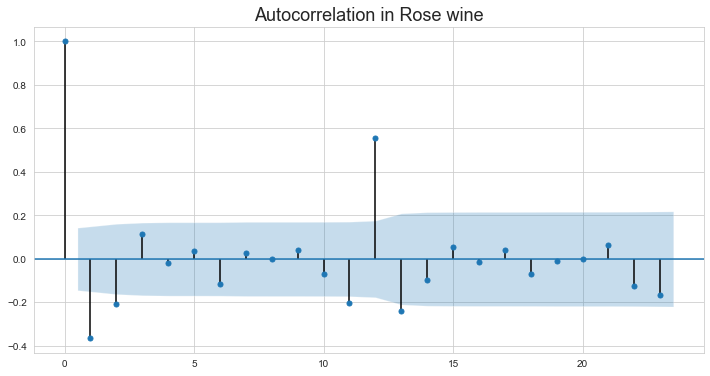

In [397]:
figure, axes = plt.subplots(figsize=(12, 6))
plot_acf(df_rose_st, alpha=0.05, ax=axes)
plt.title('Autocorrelation in Rose wine', fontsize=18)
plt.show()

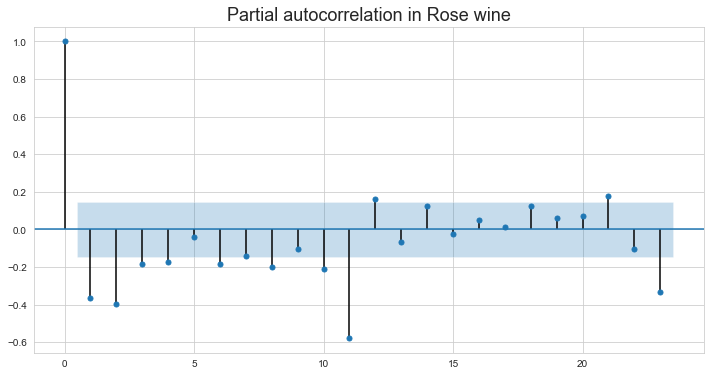

In [398]:
figure, axes = plt.subplots(figsize=(12, 6))
plot_pacf(df_rose_st, alpha=0.05, ax=axes)
plt.title('Partial autocorrelation in Rose wine', fontsize=18)
plt.show()

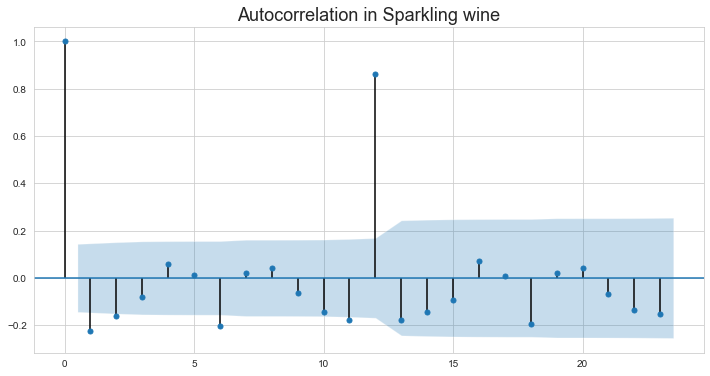

In [399]:
figure, axes = plt.subplots(figsize=(12, 6))
plot_acf(df_sparkling_st, alpha=0.05, ax=axes)
plt.title('Autocorrelation in Sparkling wine', fontsize=18)
plt.show()

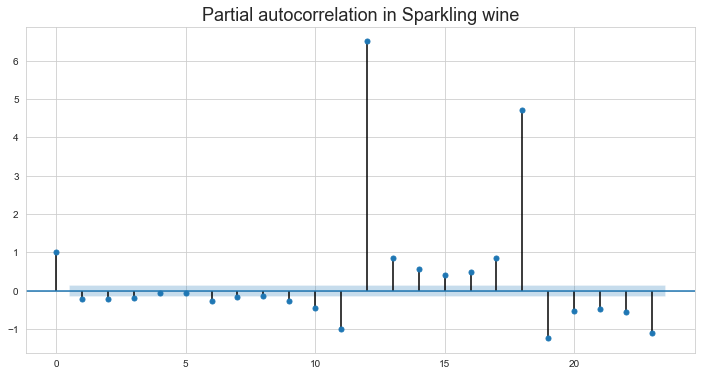

In [400]:
figure, axes = plt.subplots(figsize=(12, 6))
plot_pacf(df_sparkling_st, alpha=0.05, ax=axes)
plt.title('Partial autocorrelation in Sparkling wine', fontsize=18)
plt.show()

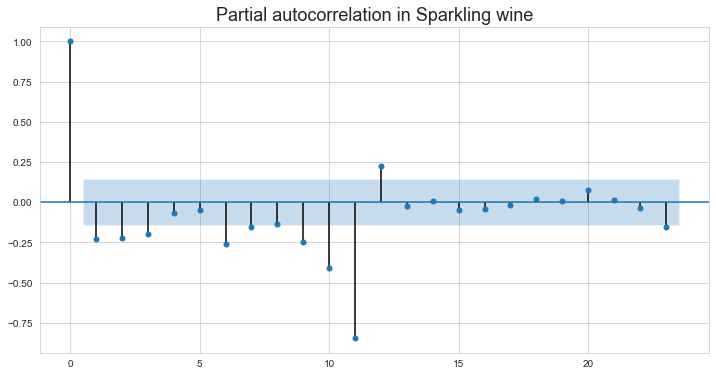

In [401]:
figure, axes = plt.subplots(figsize=(12, 6))
plot_pacf(df_sparkling_st, alpha=0.05, ax=axes, method='ywmle')
plt.title('Partial autocorrelation in Sparkling wine', fontsize=18)
plt.show()

In [402]:
train_Rose = df_rose_st.iloc[:131]
test_Rose = df_rose_st.iloc[131:]

train_Sparkling = df_sparkling_st.iloc[:131]
test_Sparkling = df_sparkling_st.iloc[131:]

In [403]:
plot1 = go.Scatter(x=train_Rose.index,y=train_Rose['Rose'], name='Training')
plot2 = go.Scatter(x=test_Rose.index,y=test_Rose['Rose'], name='Test')

fig_Rose = make_subplots(shared_xaxes=True, shared_yaxes=True)
fig_Rose.add_trace(plot1)
fig_Rose.add_trace(plot2)

fig_Rose.update_layout(
    title="Plotting Rose wine to check stationarity",
    xaxis_title="Year", yaxis_title="Sales",
    legend=dict(yanchor="top", y=0.99, xanchor="right", x=0.99, bordercolor='#1E3163', borderwidth=1),
    width=1200, height=500, plot_bgcolor = '#F8F8F8',
    margin=dict(l=0, r=0, b=0, t=30, pad=0)
)
fig_Rose.show()

In [404]:
plot1 = go.Scatter(x=train_Sparkling.index,y=train_Sparkling['Sparkling'], name='Training')
plot2 = go.Scatter(x=test_Sparkling.index,y=test_Sparkling['Sparkling'], name='Test')

fig_Sparkling = make_subplots(shared_xaxes=True, shared_yaxes=True)
fig_Sparkling.add_trace(plot1)
fig_Sparkling.add_trace(plot2)

fig_Sparkling.update_layout(
    title="Plotting Sparkling wine to check stationarity",
    xaxis_title="Year", yaxis_title="Sales",
    legend=dict(yanchor="top", y=0.99, xanchor="right", x=0.99, bordercolor='#1E3163', borderwidth=1),
    width=1200, height=500, plot_bgcolor = '#F8F8F8',
    margin=dict(l=0, r=0, b=0, t=30, pad=0)
)
fig_Sparkling.show()

In [405]:
test_Rose.head(2)

,Rose
YearMonth,
1991-01-01,-78.0
1991-02-01,1.0


In [406]:
test_Sparkling.head(2)

,Sparkling
YearMonth,
1991-01-01,-4145.0
1991-02-01,147.0


# Automated ARIMA

In [407]:
import itertools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Rose wine

In [408]:
p = q = range(0,5)
d = range(0,1)
pdq = list(itertools.product(p, d, q))

ARIMA_AIC_Rose = pd.DataFrame(columns=['params','AIC'])

for param in pdq:
    ARIMA_Rose = ARIMA(train_Rose["Rose"], order=param).fit()
    ARIMA_AIC_Rose = ARIMA_AIC_Rose.append({'params':param, 'AIC':ARIMA_Rose.aic}, ignore_index=True)
ARIMA_AIC_Rose.sort_values(by='AIC', ascending=True).head(5)

,params,AIC
18,"(3, 0, 3)",1273.194148
19,"(3, 0, 4)",1274.335328
2,"(0, 0, 2)",1276.835374
7,"(1, 0, 2)",1277.359224
6,"(1, 0, 1)",1277.775758


In [409]:
ARIMA_Rose = ARIMA(train_Rose["Rose"], order=(3,0,3)).fit()
print(ARIMA_Rose.summary())

                              ARMA Model Results                              
Dep. Variable:                   Rose   No. Observations:                  131
Model:                     ARMA(3, 3)   Log Likelihood                -628.597
Method:                       css-mle   S.D. of innovations             28.356
Date:                Tue, 31 Aug 2021   AIC                           1273.194
Time:                        07:53:26   BIC                           1296.196
Sample:                    02-01-1980   HQIC                          1282.541
                         - 12-01-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4906      0.088     -5.546      0.000      -0.664      -0.317
ar.L1.Rose    -0.7241      0.087     -8.367      0.000      -0.894      -0.555
ar.L2.Rose    -0.7216      0.087     -8.296      0.0

In [410]:
auto_ARIMA_Rose_pred = ARIMA_Rose.forecast(steps=len(test_Rose))

plot3 = go.Scatter(x=test_Rose.index, y=auto_ARIMA_Rose_pred[0], name='Auto ARIMA')
fig_Rose.add_traces(plot3); fig_Rose.show()

(array([-57.24932237,   0.80570991,   6.14308464, -21.92362599,
        10.60168047,   8.7769477 , -21.13187692,  10.8364018 ,
         8.76393339, -21.0729029 ,  10.86798809,   8.69490732,
       -21.02940382,  10.89503021,   8.62485093, -20.9861585 ,
        10.92174307,   8.5549312 , -20.94284472,  10.94821671,
         8.48517308, -20.89945642,  10.97445362,   8.41557731,
       -20.85599427,  11.00045444,   8.34614409, -20.81245904,
        11.02621978,   8.27687361, -20.76885154,  11.05175024,
         8.20776607, -20.72517255,  11.07704642,   8.13882165,
       -20.68142288,  11.10210892,   8.07004055, -20.6376033 ,
        11.12693834,   8.00142293, -20.5937146 ,  11.15153529,
         7.93296899, -20.54975756,  11.17590038,   7.8646789 ,
       -20.50573297,  11.2000342 ,   7.79655284, -20.4616416 ,
        11.22393736,   7.72859098, -20.41748424]), array([28.35601868, 35.26618639, 35.59728939, 35.64679425, 35.65924898,
       35.66608405, 35.66775141, 35.67146427, 35.68076428

In [411]:
SARIMAX_Rose = SARIMAX(train_Rose["Rose"], order=(3,0,3), seasonal_order=None, enforce_stationarity=False, enforce_invertibility=False)
SARIMAX_Rose_results = SARIMAX_Rose.fit()
print(SARIMAX_Rose_results.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  131
Model:               SARIMAX(3, 0, 3)   Log Likelihood                -609.960
Date:                Tue, 31 Aug 2021   AIC                           1233.919
Time:                        07:53:27   BIC                           1253.828
Sample:                    02-01-1980   HQIC                          1242.008
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3974      0.084     -4.725      0.000      -0.562      -0.233
ar.L2         -0.7225      0.052    -13.773      0.000      -0.825      -0.620
ar.L3          0.1047      0.062      1.688      0.0

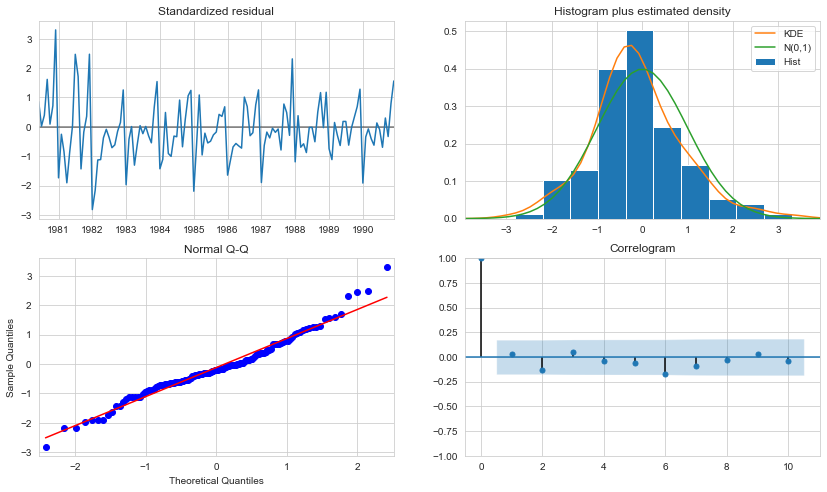

In [412]:
SARIMAX_Rose_results.plot_diagnostics(figsize=(14,8)); plt.show()

In [420]:
auto_SARIMAX_Rose_pred = SARIMAX_Rose_results.forecast(steps=len(test_Rose))

plot4 = go.Scatter(x=test_Rose.index, y=auto_SARIMAX_Rose_pred, name='Auto SARIMAX')
fig_Rose.add_traces(plot4); fig_Rose.show()

### Sparkling Wine

In [413]:
p = range(0,5)
q = range(0,4)
d = range(0,1)
pdq = list(itertools.product(p, d, q))

ARIMA_AIC_Sparkling = pd.DataFrame(columns=['params','AIC'])

for param in pdq:
    ARIMA_Sparkling = ARIMA(train_Sparkling["Sparkling"], order=param).fit()
    ARIMA_AIC_Sparkling = ARIMA_AIC_Sparkling.append({'params':param, 'AIC':ARIMA_Sparkling.aic}, ignore_index=True)
ARIMA_AIC_Sparkling.sort_values(by='AIC', ascending=True).head(5)

,params,AIC
10,"(2, 0, 2)",2210.617817
15,"(3, 0, 3)",2225.661559
19,"(4, 0, 3)",2226.954554
14,"(3, 0, 2)",2228.927871
11,"(2, 0, 3)",2229.358094


In [414]:
ARIMA_Sparkling = ARIMA(train_Sparkling["Sparkling"], order=(2,0,2)).fit()
print(ARIMA_Sparkling.summary())

                              ARMA Model Results                              
Dep. Variable:              Sparkling   No. Observations:                  131
Model:                     ARMA(2, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.361
Date:                Tue, 31 Aug 2021   AIC                           2210.618
Time:                        07:53:33   BIC                           2227.869
Sample:                    02-01-1980   HQIC                          2217.628
                         - 12-01-1990                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.5854      0.517     10.810      0.000       4.573       6.598
ar.L1.Sparkling     1.2699      0.074     17.046      0.000       1.124       1.416
ar.L2.Sparkling    -0.5601      

In [421]:
auto_ARIMA_Sparkling_pred = ARIMA_Sparkling.forecast(steps=len(test_Sparkling))

plot3 = go.Scatter(x=test_Sparkling.index, y=auto_ARIMA_Sparkling_pred[0], name='Auto ARIMA')
fig_Sparkling.add_traces(plot3); fig_Sparkling.show()

In [415]:
SARIMAX_Sparkling = SARIMAX(train_Sparkling["Sparkling"], order=(2,0,2), seasonal_order=None, enforce_stationarity=False, enforce_invertibility=False)
SARIMAX_Sparkling_results = SARIMAX_Sparkling.fit()
print(SARIMAX_Sparkling_results.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  131
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1083.791
Date:                Tue, 31 Aug 2021   AIC                           2177.582
Time:                        07:53:33   BIC                           2191.842
Sample:                    02-01-1980   HQIC                          2183.375
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2888      0.076     16.858      0.000       1.139       1.439
ar.L2         -0.5880      0.122     -4.817      0.000      -0.827      -0.349
ma.L1         -1.9054      0.084    -22.602      0.0

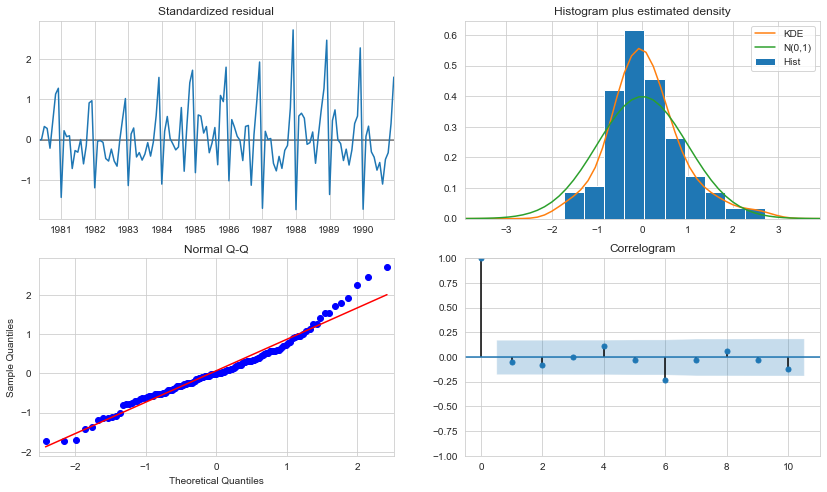

In [416]:
SARIMAX_Sparkling_results.plot_diagnostics(figsize=(14,8)); plt.show()

In [422]:
auto_SARIMAX_Sparkling_pred = SARIMAX_Sparkling_results.forecast(steps=len(test_Sparkling))

plot4 = go.Scatter(x=test_Sparkling.index, y=auto_SARIMAX_Sparkling_pred, name='Auto SARIMAX')
fig_Sparkling.add_traces(plot4); fig_Sparkling.show()